In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns

In [60]:
import arff

data_freq = arff.load('freMTPL2freq.arff')
df_freq = pd.DataFrame(data_freq, columns=["IDpol", "ClaimNb", "Exposure", "Area", "VehPower",
                                           "VehAge", "DrivAge", "BonusMalus", "VehBrand", "VehGas", "Density",
                                           "Region"])
data_sev = arff.load('freMTPL2sev.arff')
df_sev = pd.DataFrame(data_sev, columns=["IDpol", "ClaimAmount"])

df_sev

,IDpol,ClaimAmount
0,1552.0,995.20
1,1010996.0,1128.12
2,4024277.0,1851.11
3,4007252.0,1204.00
4,4046424.0,1204.00
...,...,...
26634,3254353.0,1200.00
26635,3254353.0,1800.00
26636,3254353.0,1000.00
26637,2222064.0,767.55


In [61]:
df_freq

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1.0,0.10000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
1,3.0,1.0,0.77000,'D',5.0,0.0,55.0,50.0,'B12',Regular,1217.0,'R82'
2,5.0,1.0,0.75000,'B',6.0,2.0,52.0,50.0,'B12',Diesel,54.0,'R22'
3,10.0,1.0,0.09000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
4,11.0,1.0,0.84000,'B',7.0,0.0,46.0,50.0,'B12',Diesel,76.0,'R72'
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.0,0.0,0.00274,'E',4.0,0.0,54.0,50.0,'B12',Regular,3317.0,'R93'
678009,6114327.0,0.0,0.00274,'E',4.0,0.0,41.0,95.0,'B12',Regular,9850.0,'R11'
678010,6114328.0,0.0,0.00274,'D',6.0,2.0,45.0,50.0,'B12',Diesel,1323.0,'R82'
678011,6114329.0,0.0,0.00274,'B',4.0,0.0,60.0,50.0,'B12',Regular,95.0,'R26'


In [62]:
df = pd.merge(df_freq, df_sev, on="IDpol")
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,139.0,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00
1,190.0,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84
2,414.0,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55
3,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',989.64
4,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',9844.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793.0,1.0,0.14,'C',7.0,2.0,51.0,50.0,'B12',Diesel,178.0,'R72',1769.88
26440,6113817.0,1.0,0.17,'D',4.0,0.0,35.0,51.0,'B12',Regular,1719.0,'R82',1288.28
26441,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',10290.00
26442,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',1940.40


# Exploratory data analysis (EDA)

In [63]:
# Check for missing values
print(df.isnull().sum())

# Examine data distributions and correlations
df.describe()


IDpol          0
ClaimNb        0
Exposure       0
Area           0
VehPower       0
VehAge         0
DrivAge        0
BonusMalus     0
VehBrand       0
VehGas         0
Density        0
Region         0
ClaimAmount    0
dtype: int64


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,2.644400e+04,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,26444.000000,2.644400e+04
mean,2.280004e+06,1.139427,0.691791,6.464415,7.355090,45.121502,65.231054,2015.302942,2.265513e+03
std,1.583004e+06,0.617563,0.313213,2.017260,5.165475,14.694677,20.143480,4162.639153,2.937103e+04
min,1.390000e+02,1.000000,0.002740,4.000000,0.000000,18.000000,50.000000,2.000000,1.000000e+00
25%,1.086381e+06,1.000000,0.450000,5.000000,3.000000,34.000000,50.000000,115.000000,6.859925e+02
50%,2.133756e+06,1.000000,0.760000,6.000000,7.000000,45.000000,55.000000,524.500000,1.172000e+03
75%,3.183953e+06,1.000000,1.000000,7.000000,11.000000,54.000000,76.000000,2252.000000,1.212385e+03
max,6.113971e+06,16.000000,2.000000,15.000000,99.000000,99.000000,228.000000,27000.000000,4.075401e+06


<Axes: >

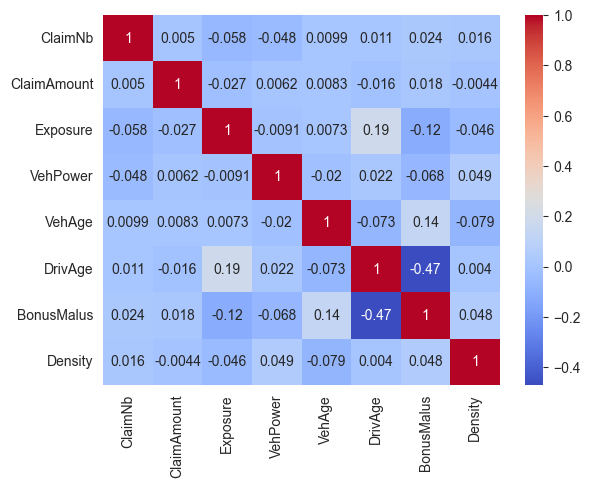

In [64]:
correlation = df[['ClaimNb', 'ClaimAmount', 'Exposure', 'VehPower', 'VehAge', 'DrivAge',
                  'BonusMalus', 'Density']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')




In [65]:
for column in df.columns:
    if df[column].nunique() < 100:
        print(f"{column}: {df[column].unique()}")

    else:
        print(f"{column}: {df[column].nunique()} unique values")

IDpol: 24944 unique values
ClaimNb: [ 1.  2.  3.  4.  5.  6.  8. 16.  9. 11.]
Exposure: 131 unique values
Area: ["'F'" "'B'" "'E'" "'A'" "'D'" "'C'"]
VehPower: [ 7. 12.  4. 10.  5.  9.  6.  8. 11. 15. 14. 13.]
VehAge: [ 1.  5.  0.  6. 10.  7.  4.  8.  2.  9.  3. 13. 12. 18. 11. 14. 16. 15.
 17. 21. 19. 20. 24. 22. 29. 26. 23. 28. 30. 31. 36. 25. 99. 35. 33. 39.
 27. 69. 84. 32.]
DrivAge: [61. 50. 36. 51. 45. 54. 34. 44. 24. 60. 28. 76. 67. 39. 47. 35. 74. 49.
 52. 78. 22. 71. 32. 53. 48. 26. 68. 29. 43. 27. 30. 25. 69. 37. 46. 23.
 42. 41. 18. 55. 31. 33. 73. 56. 75. 63. 65. 72. 62. 79. 66. 86. 64. 80.
 87. 58. 82. 81. 84. 59. 70. 77. 57. 38. 20. 19. 40. 21. 99. 85. 88. 95.
 89. 90. 83. 91. 94. 93.]
BonusMalus: [ 50.  60.  85. 100.  64. 105.  80.  72.  57.  56.  67.  51.  70.  76.
  68.  55.  90.  71.  75.  58.  66.  62.  61.  52.  65.  69. 102.  77.
  73.  54.  83.  82.  74. 112.  95. 147.  53.  88. 125.  59. 107. 132.
  92.  86.  78.  63.  81. 106.  87. 148. 114.  91. 139. 118. 103. 

In [67]:
df['ClaimNb_norm'] = df.ClaimNb / df.Exposure
df['ClaimAmount_norm'] = df.ClaimAmount / df.Exposure
df

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,ClaimNb_norm,ClaimAmount_norm
0,139.0,1.0,0.75,'F',7.0,1.0,61.0,50.0,'B12',Regular,27000.0,'R11',303.00,1.333333,404.000000
1,190.0,1.0,0.14,'B',12.0,5.0,50.0,60.0,'B12',Diesel,56.0,'R25',1981.84,7.142857,14156.000000
2,414.0,1.0,0.14,'E',4.0,0.0,36.0,85.0,'B12',Regular,4792.0,'R11',1456.55,7.142857,10403.928571
3,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',989.64,3.225806,1596.193548
4,424.0,2.0,0.62,'F',10.0,0.0,51.0,100.0,'B12',Regular,27000.0,'R11',9844.36,3.225806,15878.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793.0,1.0,0.14,'C',7.0,2.0,51.0,50.0,'B12',Diesel,178.0,'R72',1769.88,7.142857,12642.000000
26440,6113817.0,1.0,0.17,'D',4.0,0.0,35.0,51.0,'B12',Regular,1719.0,'R82',1288.28,5.882353,7578.117647
26441,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',10290.00,11.764706,60529.411765
26442,6113834.0,2.0,0.17,'C',15.0,3.0,36.0,50.0,'B12',Regular,181.0,'R54',1940.40,11.764706,11414.117647


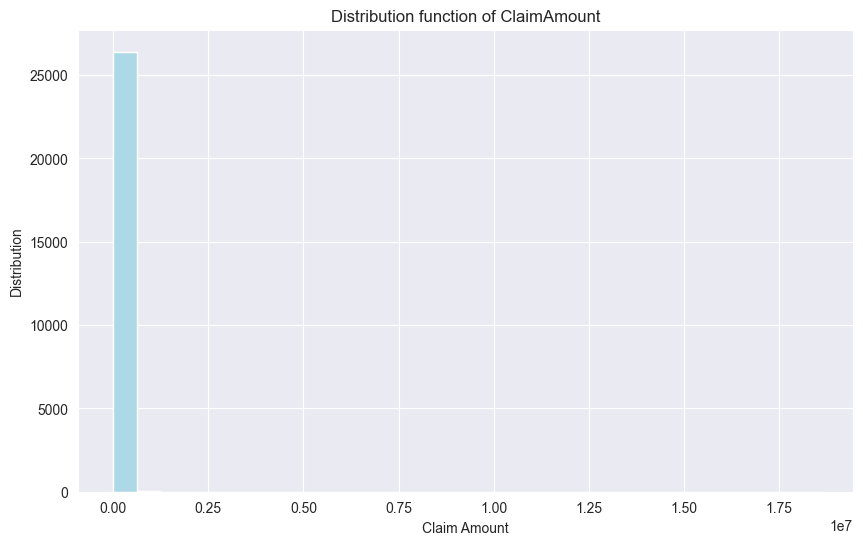

In [70]:
import matplotlib.pyplot as plt

# Distribution function of df.ClaimAmount
plt.figure(figsize=(10, 6))
plt.hist(df['ClaimAmount_norm'], density=False, bins=30, color='lightblue')
plt.title("Distribution function of ClaimAmount")
plt.xlabel("Claim Amount")
plt.ylabel("Distribution")
plt.grid(True)
plt.show()



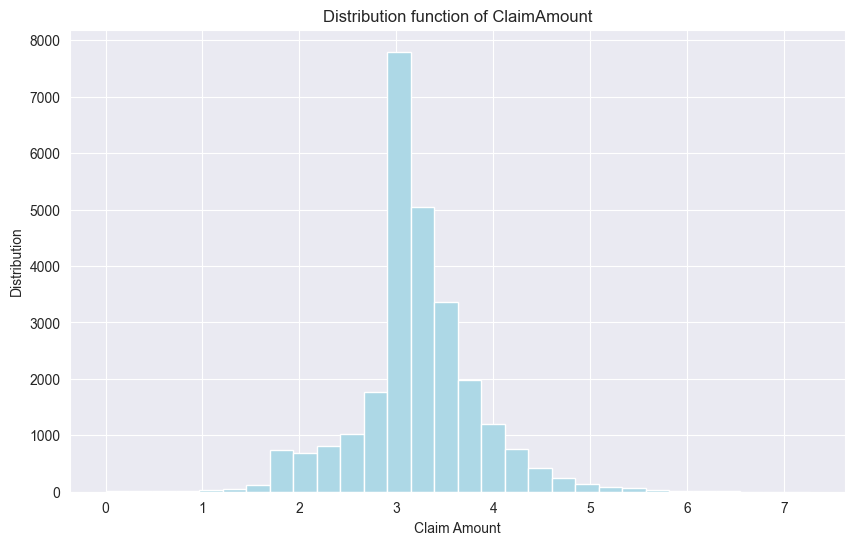

In [69]:
# Convert ClaimAmount to logarithmic scale to address right skewness
df['ClaimAmount_norm_log'] = df['ClaimAmount_norm'].apply(lambda x: np.log10(x))
# Distribution function of df.ClaimAmount
plt.figure(figsize=(10, 6))
plt.hist(df['ClaimAmount_norm_log'], density=False, bins=30, color='lightblue')
plt.title("Distribution function of ClaimAmount")
plt.xlabel("Claim Amount")
plt.ylabel("Distribution")
plt.grid(True)
plt.show()

# Feature engineering

In [71]:
df.dtypes

IDpol                   float64
ClaimNb                 float64
Exposure                float64
Area                     object
VehPower                float64
VehAge                  float64
DrivAge                 float64
BonusMalus              float64
VehBrand                 object
VehGas                   object
Density                 float64
Region                   object
ClaimAmount             float64
ClaimNb_norm            float64
ClaimAmount_norm        float64
ClaimAmount_norm_log    float64
dtype: object

In [72]:
# One-Hot Encoding of categorical columns
df = pd.get_dummies(df, columns=["Area", "VehBrand", "VehGas", "Region"], dtype=int)

df

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimNb_norm,...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
0,139.0,1.0,0.75,7.0,1.0,61.0,50.0,27000.0,303.00,1.333333,...,0,0,0,0,0,0,0,0,0,0
1,190.0,1.0,0.14,12.0,5.0,50.0,60.0,56.0,1981.84,7.142857,...,0,0,0,0,0,0,0,0,0,0
2,414.0,1.0,0.14,4.0,0.0,36.0,85.0,4792.0,1456.55,7.142857,...,0,0,0,0,0,0,0,0,0,0
3,424.0,2.0,0.62,10.0,0.0,51.0,100.0,27000.0,989.64,3.225806,...,0,0,0,0,0,0,0,0,0,0
4,424.0,2.0,0.62,10.0,0.0,51.0,100.0,27000.0,9844.36,3.225806,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793.0,1.0,0.14,7.0,2.0,51.0,50.0,178.0,1769.88,7.142857,...,0,0,1,0,0,0,0,0,0,0
26440,6113817.0,1.0,0.17,4.0,0.0,35.0,51.0,1719.0,1288.28,5.882353,...,0,0,0,0,0,1,0,0,0,0
26441,6113834.0,2.0,0.17,15.0,3.0,36.0,50.0,181.0,10290.00,11.764706,...,0,1,0,0,0,0,0,0,0,0
26442,6113834.0,2.0,0.17,15.0,3.0,36.0,50.0,181.0,1940.40,11.764706,...,0,1,0,0,0,0,0,0,0,0


In [73]:
df.dropna()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount,ClaimNb_norm,...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
0,139.0,1.0,0.75,7.0,1.0,61.0,50.0,27000.0,303.00,1.333333,...,0,0,0,0,0,0,0,0,0,0
1,190.0,1.0,0.14,12.0,5.0,50.0,60.0,56.0,1981.84,7.142857,...,0,0,0,0,0,0,0,0,0,0
2,414.0,1.0,0.14,4.0,0.0,36.0,85.0,4792.0,1456.55,7.142857,...,0,0,0,0,0,0,0,0,0,0
3,424.0,2.0,0.62,10.0,0.0,51.0,100.0,27000.0,989.64,3.225806,...,0,0,0,0,0,0,0,0,0,0
4,424.0,2.0,0.62,10.0,0.0,51.0,100.0,27000.0,9844.36,3.225806,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,6113793.0,1.0,0.14,7.0,2.0,51.0,50.0,178.0,1769.88,7.142857,...,0,0,1,0,0,0,0,0,0,0
26440,6113817.0,1.0,0.17,4.0,0.0,35.0,51.0,1719.0,1288.28,5.882353,...,0,0,0,0,0,1,0,0,0,0
26441,6113834.0,2.0,0.17,15.0,3.0,36.0,50.0,181.0,10290.00,11.764706,...,0,1,0,0,0,0,0,0,0,0
26442,6113834.0,2.0,0.17,15.0,3.0,36.0,50.0,181.0,1940.40,11.764706,...,0,1,0,0,0,0,0,0,0,0


# Model comparison

In [85]:
from sklearn.metrics import mean_absolute_percentage_error as mape

# Split the data into training and test sets
X = df.drop(['IDpol', 'ClaimAmount', 'ClaimNb', 'ClaimAmount_norm', 'Exposure', 'ClaimAmount_norm_log'], axis=1)
# X = X.drop(['ClaimNb_norm'], axis=1)
# X = X.drop(['BonusMalus'], axis=1)
# X = X[X.columns.drop(list(X.filter(regex='Region')))]
# X = X[X.columns.drop(list(X.filter(regex='VehBrand')))]

y = df["ClaimAmount_norm"]
# y = df["ClaimNb_norm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and evaluate linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5
mape_lr = mape(y_test, y_pred_lr)
print("linear regression RMSE: ", rmse_lr, " and MAPE: ", mape_lr)

# Train and evaluate random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
mape_rf = mape(y_test, y_pred_rf)
print("random forest RMSE: ", rmse_rf, " and MAPE: ", mape_rf)

# Train and evaluate gradient boosting model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_gb = model.predict(X_test)
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5
mape_gb = mape(y_test, y_pred_gb)
print("gradient boosting RMSE: ", rmse_gb, " and MAPE: ", mape_gb)


linear regression RMSE:  75685.22013886528  and MAPE:  16.21620402809
random forest RMSE:  90291.41398426087  and MAPE:  5.322054184492145
gradient boosting RMSE:  156942.22846388235  and MAPE:  6.401495036055928


In [81]:
X

,VehPower,VehAge,DrivAge,BonusMalus,Density,Area_'A',Area_'B',Area_'C',Area_'D',Area_'E',...,Region_'R53',Region_'R54',Region_'R72',Region_'R73',Region_'R74',Region_'R82',Region_'R83',Region_'R91',Region_'R93',Region_'R94'
0,7.0,1.0,61.0,50.0,27000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.0,5.0,50.0,60.0,56.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.0,36.0,85.0,4792.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10.0,0.0,51.0,100.0,27000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.0,0.0,51.0,100.0,27000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,7.0,2.0,51.0,50.0,178.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
26440,4.0,0.0,35.0,51.0,1719.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
26441,15.0,3.0,36.0,50.0,181.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
26442,15.0,3.0,36.0,50.0,181.0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [86]:
y

0          404.000000
1        14156.000000
2        10403.928571
3         1596.193548
4        15878.000000
             ...     
26439    12642.000000
26440     7578.117647
26441    60529.411765
26442    11414.117647
26443    11169.230769
Name: ClaimAmount_norm, Length: 26444, dtype: float64

# Model building

In [ ]:
from sklearn.model_selection import GridSearchCV

import time

start = time.time()

start = time.time()
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.7, 0.8, 0.9],
}
# 
# param_grid = {
#     'n_estimators': [200],
#     'learning_rate': [0.1],
#     'max_depth': [5],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'subsample': [0.8],
# }

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

execution_time = time.time() - start
print("Execution time:", execution_time)

print(grid_search.best_params_)
print(grid_search.best_score_)

# Evaluation

In [ ]:
# Choose the best model with tuned hyperparameters
model = grid_search.best_estimator_

# Predict damage heights for the test set
y_pred = model.predict(X_test)

# Evaluate model performance using RMSE
mape_evaluation = mape(y_test, y_pred)
print("MAPE for tuned random forest:", mape_evaluation)

# Feature importance

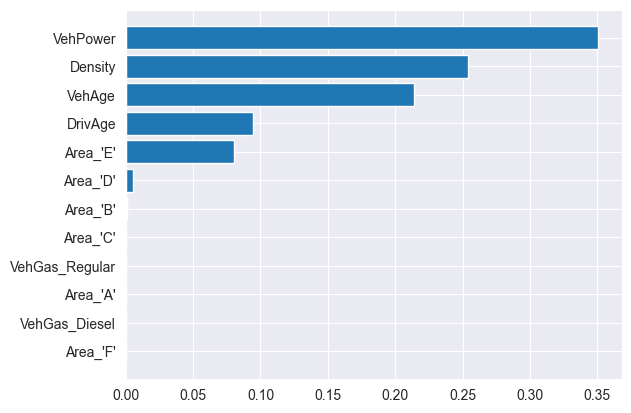

In [31]:
# Calculate feature importances
feature_importances = model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)
sorted_features = X.columns[sorted_idx]

# Plot feature importances
plt.barh(sorted_features, feature_importances[sorted_idx])
plt.show()


<Axes: >

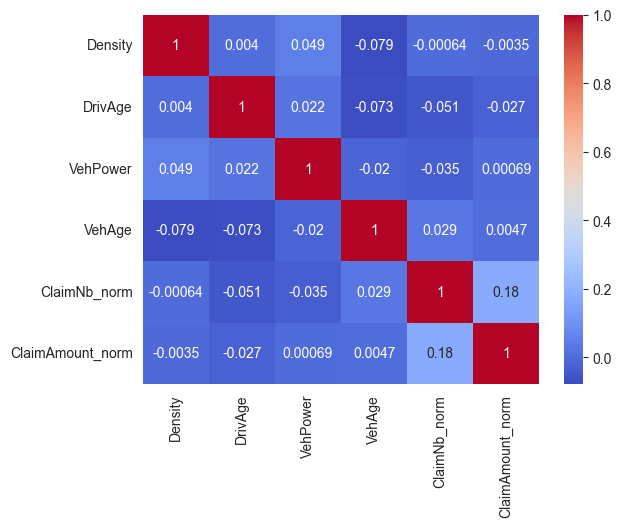

In [32]:
correlation = df[['Density', 'DrivAge', 'VehPower', 'VehAge', 'ClaimNb_norm', 'ClaimAmount_norm']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')